In [27]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import pandas as pd

path = "/content/drive/My Drive/ML/datasets/predicting_house_prices_tf/data.csv"
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
df = pd.read_csv(path, names=column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [66]:
#check for missing data

df.isnull().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [57]:
matrix_correlation = df.corr()
matrix_correlation['price'].sort_values(ascending=False)

price        1.000000
distance     0.651004
age          0.616318
stores       0.158329
date         0.036171
serial       0.024383
longitude    0.020915
latitude     0.010986
Name: price, dtype: float64

In [72]:
# drop low correlated columns to the target

#df = df.drop(['latitude', 'longitude'], axis=1)
df = df.drop(columns=['latitude', 'longitude'])

In [73]:
# data normalization
from sklearn.preprocessing import StandardScaler

features = list(df.drop(columns = 'price'))
X = StandardScaler().fit_transform(df[features])
y = df['price']
print(pd.DataFrame(data=X).head())
print(y)

          0         1         2         3         4
0 -1.731704  0.015979  0.181402  1.257127  0.345258
1 -1.731012 -0.350520 -1.319250 -0.930703 -0.609373
2 -1.730319  1.298728 -0.083419 -0.618156  0.663469
3 -1.729626 -1.266769 -0.524787 -0.930703 -0.927583
4 -1.728933  0.932228  0.534497  0.006939  0.981679
0       14264
1       12032
2       13560
3       12029
4       14157
        ...  
4995    13539
4996    14757
4997    14102
4998    14313
4999    12770
Name: price, Length: 5000, dtype: int64


In [77]:
print(y.shape)
print(X.shape)

(5000,)
(5000, 5)


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(10, input_shape=(5,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_17 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [86]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
125/125 [==============================] - 0s 2ms/step - loss: 194569680.0000 - val_loss: 193665808.0000
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 193952480.0000 - val_loss: 192140704.0000
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 189639200.0000 - val_loss: 184119792.0000
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: 174522528.0000 - val_loss: 161779456.0000
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 141502096.0000 - val_loss: 120173664.0000
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 92220392.0000 - val_loss: 69216352.0000
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 45762848.0000 - val_loss: 30909212.0000
Epoch 8/100
125/125 [==============================] - 0s 1ms/step - loss: 19134700.0000 - val_loss: 12982136.0000
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - l

Text(0.5, 0, 'Epochs')

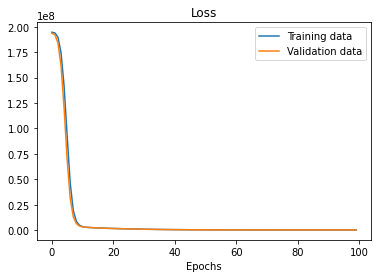

In [89]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training data', 'Validation data'])
plt.title('Loss')
plt.xlabel('Epochs')

In [93]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score: ', score)

Test score:  170230.046875
